In [1]:
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_reits()], 120)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-02-25 to 2019-06-24 - 113'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 5) & (stat['21-mean'] > 1) & (stat['21-shrp'] > 0.6)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
AMH,63,3.605934,1.477345,2.328005,3.088962
BXMT,63,2.171797,1.158393,1.730958,2.677343
INVH,63,4.530903,2.694522,1.619670,3.809150
EQIX,63,4.857679,3.087596,1.519309,4.324717
WPC,63,4.229732,2.849661,1.425806,4.296338
PMT,63,2.266158,1.766051,1.188806,4.901510
PSA,63,4.117820,3.385696,1.167014,4.410452
AMT,63,4.798336,4.169170,1.110933,4.096795
STAG,63,3.061213,3.059303,0.946146,4.545455


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['VNQ'], sr=1)

['VNQ'] 1.2266332038561205 1 0.7950028117415554 0.7683696078854348
['VNQ', 'AMH'] -0.2788427867834704 0.5629470033918098 0.7063976037759322 1.5481873939512125
['VNQ', 'BXMT'] -0.46957705393790783 0.11485086869111982 0.6652356683491181 1.2496635909781457


['VNQ', 'BXMT']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 4, ['VNQ', 'BXMT'], sr=0)

['VNQ', 'BXMT'] 0.7800865370402379 0.11485086869111982 0.6652356683491181 1.2496635909781457
['VNQ', 'BXMT', 'AMH'] 0.6425672585840041 0.3931460144144891 0.649421244169515 1.6091107873244272
['VNQ', 'BXMT', 'AMH', 'INVH'] 0.23428625514124984 0.35676283164254424 0.6775234234987056 1.611750564771139
['VNQ', 'BXMT', 'AMH', 'EQIX'] 0.18614959129349234 0.282847788012139 0.7033018032813534 1.5866603183096066
['VNQ', 'BXMT', 'AMH', 'PSA'] 0.13158237421153304 0.22399386427119836 0.7075885099403347 1.4985865024542087
['VNQ', 'BXMT', 'INVH', 'ARI'] 0.1041956793895891 0.19515886030543164 0.7090368190841575 1.2121748550018925
['VNQ', 'BXMT', 'PSA', 'GLPI'] 0.039890547431107704 0.08571405416547366 0.7541764932656341 1.1413042072713988
['VNQ', 'BXMT', 'PSA', 'ARI'] 0.0095261667364675 0.0704242612106812 0.7391019055257864 1.0990107926849622


['VNQ', 'BXMT', 'PSA', 'ARI']

In [5]:
quote.setup_mask(['VNQ', 'BXMT'])
quote.find_optimal_ratio(21, 2, {0: .4})

     fun: 1.1175749785293378
     jac: array([2.23239174, 2.23588297])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 7
    njev: 3
  status: 0
 success: True
       x: array([0.20994857, 0.79005143])


/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


({'VNQ': 0.21, 'BXMT': 0.79}, 2.0846, 1.0572)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
BXMT,62.0,2.197840,1.149105,-0.871525,1.600847,2.252276,3.068974,4.384921,1.767614,2.677343
Portfolio,62.0,2.011600,1.146871,-0.503897,1.276775,2.139973,2.806189,4.474868,1.608667,2.145118
VNQ,62.0,1.745606,2.084080,-2.311019,0.077226,2.246910,3.205952,5.608280,0.757619,3.975014


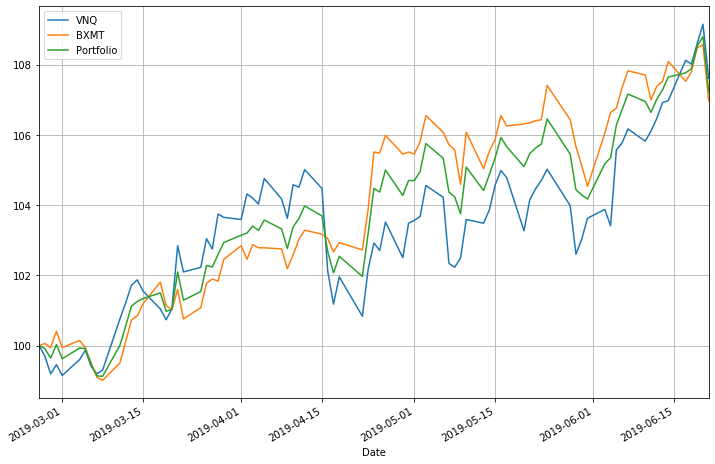

In [9]:
%pylab inline
quote.setup_mask(['VNQ', 'BXMT'])
quote.graph(21, {'VNQ': 0.4, 'BXMT': 0.6})